In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
url = "https://books.toscrape.com/"
response = requests.get(url)

# Check request worked
response.status_code


200

In [21]:
soup = BeautifulSoup(response.text, "html.parser")


In [22]:
books = soup.find_all("article", class_="product_pod")

len(books)  # number of books on page



20

In [23]:
books_data = []

for book in books:
    # Title
    title = book.h3.a["title"]

    # Price (robust cleaning)
    raw_price = book.find("p", class_="price_color").text
    price = "".join(c for c in raw_price if c.isdigit() or c == ".")
    price = float(price)

    # Rating
    rating = book.p["class"][1]

    # Availability
    availability = book.find("p", class_="instock availability").text.strip()

    books_data.append({
        "title": title,
        "price_gbp": price,
        "rating": rating,
        "availability": availability
    })


In [24]:
df = pd.DataFrame(books_data)
df.head()


,title,price_gbp,rating,availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


In [25]:
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

df["rating"] = df["rating"].map(rating_map)


In [26]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         20 non-null     object 
 1   price_gbp     20 non-null     float64
 2   rating        20 non-null     int64  
 3   availability  20 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 772.0+ bytes


,price_gbp,rating
count,20.000000,20.000000
mean,38.048500,2.850000
std,15.135231,1.565248
min,13.990000,1.000000
25%,22.637500,1.000000
50%,41.380000,3.000000
75%,51.865000,4.000000
max,57.250000,5.000000


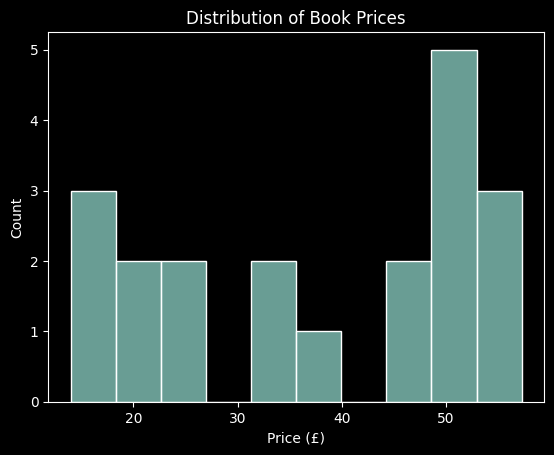

In [27]:
plt.figure()
sns.histplot(df["price_gbp"], bins=10)
plt.title("Distribution of Book Prices")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()


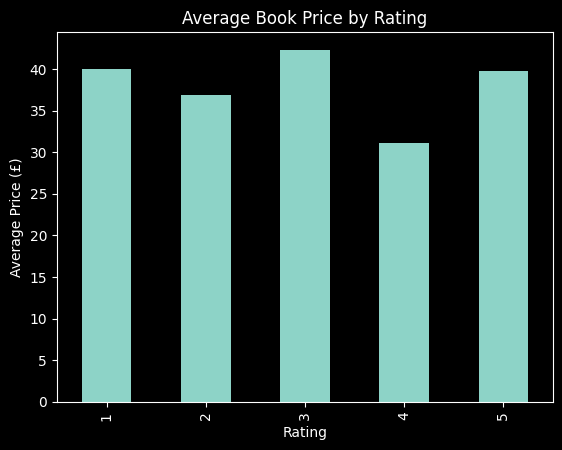

In [28]:
plt.figure()
df.groupby("rating")["price_gbp"].mean().plot(kind="bar")
plt.title("Average Book Price by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Price (£)")
plt.show()


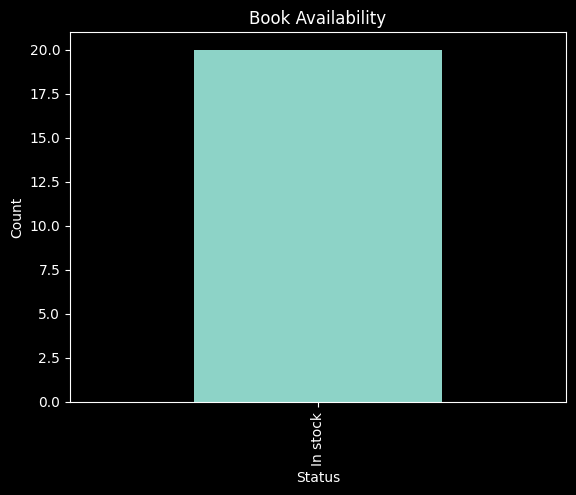

In [29]:
plt.figure()
df["availability"].value_counts().plot(kind="bar")
plt.title("Book Availability")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


In [30]:
df.to_csv("books_data.csv", index=False)
